<a href="https://colab.research.google.com/github/Xiao-Chen820/ASU-GIS322-Fall-2023/blob/master/notebooks/03_Module3b_shapely_spatial_relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spatial relationship

This lecture will introduce how to use shapely to identify spatial relationships between geometries

### Binary Predicates

Standard binary predicates are implemented as methods. These predicates evaluate topological, set-theoretic relationships. In a few cases the results may not be what one might expect starting from different assumptions. All take another geometric object as argument and return True or False.




### 1. Equivalent

**object.__ eq__(other)**:

Returns True if the two objects are of the same geometric type, and the coordinates of the two objects match precisely.

**object.equals(other)**:

Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.

The coordinates passed to the object constructors are of these sets, and determine them, but are not the entirety of the sets. This is a potential “gotcha” for new users. Equivalent lines, for example, can be constructed differently.

**object.almost_equals(other[, decimal=6])**

Returns True if the object is approximately equal to the other at all points to specified decimal place precision.


In [ ]:
from shapely.geometry import LineString

#The coordinates passed to the object constructors are of these sets, and determine them,
#but are not the entirety of the sets. Equivalent lines, for example, can be constructed differently.

a = LineString([(0, 0), (1, 1)])

b = LineString([(0, 0), (0.5, 0.5), (1, 1)])

c = LineString([(0, 0), (0, 0), (1, 1)])

# since a and b and c are all on the same line, so they are equivalent

print("a equals to b? ", a.equals(b))  # will return True

print("b equals to c? ", a.equals(b))  # will return True

print("a==b? ", a == b ) # this is to check whether they are the same object, not if they refer to the same line




a equals to b?  True
b equals to c?  True
a==b?  False


### 2. Contains and Within

**object.contains(other)**

Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.

**object.within(other)**

This predicate applies to all types, and is inverse to within(). The expression a.contains(b) == b.within(a) always evaluates to True.

**Note:** A line’s endpoints are part of its boundary and are therefore not contained.


In [ ]:
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import Polygon


# define a shapely Point and a shapely LineString

pt = Point(0.5, 0.5)

coords = [(0, 0), (1, 1)]
line = LineString(coords)

print(line.contains(pt))

print(pt.within(line))

# NOTE: A line’s endpoints are part of its boundary and are therefore not contained.
pt2 = Point(1.0, 1.0)
print(line.contains(pt2))


True
True
False


In [ ]:
# Point in Polgyon

a = Point(2, 2)
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])
c = Polygon([[0, 0], [0, 4], [4, 4], [4, 0]])
d = Point(-1, -1)

a.within(b)
d.within(c)

False

### 3. Cross

**object.crosses(other)**

Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.

In [ ]:
# We can write the cross statement as:
print(LineString(coords).crosses(LineString([(0, 1), (1, 0)])))

# Or:
coords2 = [(0, 1), (1, 0)]
line2 = LineString(coords2)

print(line.crosses(line2))


#NOTE: A line does not cross a point that it contains.
print(line.crosses(Point(0.5, 0.5)))

True
True
False


### 4. Disjoint

**object.disjoint(other)**

Returns True if the boundary and interior of the object do not intersect at all with those of the other.

In [ ]:
Point(0, 0).disjoint(Point(1, 1))

True

### 5. Intersect, Overlap and Touch

**object.intersects(other)**

Returns True if the boundary or interior of the object intersect in any way with those of the other.

In other words, geometric objects intersect if they have any boundary or interior point in common.

**object.overlaps(other)**

Returns True if the objects intersect (see above) but neither contains the other.

**object.touches(other)**

Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.

In [ ]:
a = LineString([(0, 0), (1, 1)])

b = LineString([(1, 1), (2, 2)])

a.touches(b)


True

## DE-9IM Relationships and Spatial Analysis Methods

As well as boolean attributes and methods, Shapely provides analysis methods that return new geometric objects.

Almost every binary predicate method has a counterpart that returns a new geometric object. In addition, the set-theoretic boundary of an object is available as a read-only attribute.





### 1. Object.boundary

Returns a lower dimensional object representing the object’s set-theoretic boundary.

Boundary of the lines:  MULTIPOINT (-1 0, 0 0, 1 0, 1 1)
Type of the boundary object of the MultiLineString:  <class 'shapely.geometry.multipoint.MultiPoint'>
-1.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0


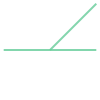

In [ ]:
from shapely.geometry import MultiLineString

coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)

print("Boundary of the lines: ", lines.boundary)
print("Type of the boundary object of the MultiLineString: ", type(lines.boundary))

#print the coords of the boundary
for pt in lines.boundary.geoms:
   print(pt.x, pt.y)


lines




### 2. Centroid



<class 'shapely.geometry.point.Point'>
Centroid of line (0, 0), (1, 1):  POINT (0.5 0.5)
Centroid of polygon b:  POINT (2 2)


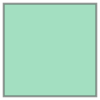

In [ ]:
lcent = LineString([(0, 0), (1, 1)]).centroid # get centroid of a line

print(type(lcent))

print("Centroid of line (0, 0), (1, 1): ", lcent)

# Get centroid of a polygon
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])

pcent = b.centroid

print("Centroid of polygon b: ", pcent)

b

### 3. Difference

**object.difference(other)**:

Returns a representation of the points making up this geometric object that do not make up the other object.


**object.symmetric_difference(other):**

Returns a representation of the points in this object not in the other geometric object, and the points in the other not in this geometric object.


a-b yield below polygon: 

1.4354270158816935 -0.43541050359831335
1.2926354830241924 -0.47117792060484565
1.147025710494341 -0.4927770900082953
1.0 -0.5
0.852974289505659 -0.4927770900082953
0.7073645169758077 -0.47117792060484565
0.5645729841183067 -0.43541050359831335
0.42597485145236536 -0.38581929876693
0.29290489476100345 -0.32288189652253263
0.16664465047059707 -0.24720441845381824
0.04841007375453188 -0.15951568004410577
-0.06066017177982119 -0.060660171779821415
-0.15951568004410555 0.04841007375453177
-0.24720441845381802 0.16664465047059673
-0.3228818965225324 0.29290489476100323
-0.38581929876693 0.42597485145236513
-0.43541050359831335 0.5645729841183065
-0.47117792060484565 0.7073645169758072
-0.4927770900082953 0.8529742895056588
-0.5 0.9999999999999998
-0.4927770900082953 1.1470257104943409
-0.47117792060484565 1.2926354830241924
-0.43541050359831335 1.435427015881693
-0.3858192987669302 1.5740251485476344
-0.32288189652253263 1.7070951052389964
-0.24720441845381824 1.8

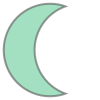

In [ ]:
# Get two circles
a = Point(1, 1).buffer(1.5)

b = Point(2, 1).buffer(1.5)

# Take the difference and return a Polygon containing part in a but not in b
c = a.difference(b)

print("a-b yield below polygon: \n")

# print coordinates of the polygon
for pt in c.exterior.coords:
  print(pt[0], pt[1])

c

### 4. Union

**object.union(other):**

Returns a representation of the union of points from this object and the other geometric object.

The type of object returned depends on the relationship between the operands. The union of polygons (for example) will be a polygon or a multi-polygon depending on whether they intersect or not.


<class 'shapely.geometry.polygon.Polygon'>


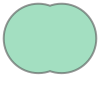

In [ ]:
a = Point(1, 1).buffer(1.5)

b = Point(2, 1).buffer(1.5)

c = a.union(b)

print(type(c))

# Exercise: Get all the coordinates of the intersected polygon c

c

### 5. Intersection

**object.intersection(other):**

Returns a representation of the intersection of this object with the other geometric object.

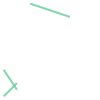

In [ ]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 0.5), (0, 2)])
line_c = LineString([(5, 6), (2, 7)])

line_b.intersection(line_a)

multi_line = MultiLineString([line_a, line_b, line_c])

multi_line



In [ ]:
num = len(multi_line.geoms)

# check the intersection of every two lines in the MultiLineString
for i in range(num-1): # from the first to the second last line
    for j in range(i+1, num): # from i+1 to the end
        line_i = multi_line.geoms[i]
        line_j = multi_line.geoms[j]
        print(line_i.intersection(line_j))

POINT (0.8 0.8)
LINESTRING Z EMPTY
LINESTRING Z EMPTY


## Constructive Methods

Shapely geometric object have several methods that yield new objects not derived from set-theoretic analysis.


### 1. Buffer

**object.buffer**(distance, resolution=16, cap_style=1, join_style=1, mitre_limit=5.0)

Returns an approximate representation of all points within a given distance of the this geometric object.

The styles of caps are specified by integer values: 1 (round), 2 (flat), 3 (square). These values are also enumerated by the object shapely.geometry.CAP_STYLE (see below).

The styles of joins between offset segments are specified by integer values: 1 (round), 2 (mitre), and 3 (bevel). These values are also enumerated by the object shapely.geometry.JOIN_STYLE (see below).

shapely.geometry.CAP_STYLE
Attribute	Value
round	1
flat	2
square	3
shapely.geometry.JOIN_STYLE
Attribute	Value
round	1
mitre	2
bevel	3

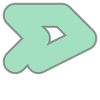

In [ ]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

dilated = line.buffer(0.5)

dilated

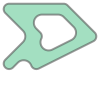

In [ ]:
eroded = dilated.buffer(-0.3)

eroded

### 2. Convex_hull

**object.convex_hull**:

Returns a representation of the smallest convex Polygon containing all the points in the object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

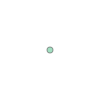

In [ ]:
c = Point(0, 0).convex_hull

c


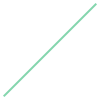

In [ ]:
from shapely.geometry import MultiPoint

d = MultiPoint([(0, 0), (1, 1)]).convex_hull

d

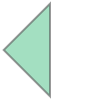

In [ ]:
e = MultiPoint([(0, 0), (1, 1), (1, -1)]).convex_hull

e

### 3. Envelop


**object.envelope:**:

Returns a representation of the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains the object.

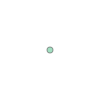

In [ ]:
Point(0, 0).envelope

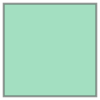

In [ ]:
MultiPoint([(0, 0), (1, 1)]).envelope

### 4. Minimum rotated rectangle


**object.minimum_rotated_rectangle** :

Returns the general minimum bounding rectangle that contains the object. Unlike envelope this rectangle is not constrained to be parallel to the coordinate axes. If the convex hull of the object is a degenerate (line or point) this degenerate is returned.

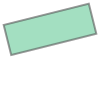

In [ ]:
MultiPoint([(0,0),(1,1),(2,0.5)]).minimum_rotated_rectangle

### 5. Simplify

**object.simplify(tolerance, preserve_topology=True)**

Returns a simplified representation of the geometric object.

All points in the simplified object will be within the tolerance distance of the original geometry. By default a slower algorithm is used that preserves topology. If preserve topology is set to False the much quicker Douglas-Peucker algorithm is used.

In [ ]:
p = Point(0.0, 0.0)

x = p.buffer(1.0)

print("x's area is: ", x.area)

print("total number of points along x boundary: ", len(x.exterior.coords))

s = x.simplify(0.05, preserve_topology=False)

print("area after simplify the polygon: ", s.area)

print("total number of points along the simplified boundary: ", len(s.exterior.coords))

# you can see from the below results, the change of area is small after the simplification
# but total number of points has reduced from 66 to 17, making the polygon representation much simpler


x's area is:  3.1365484905459398
total number of points along x boundary:  65
area after simplify the polygon:  3.061467458920719
total number of points along the simplified boundary:  17
